In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
base = pd.read_csv('PS4_GamesSales.csv', encoding='latin-1')

In [ ]:
base.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [ ]:
# Dimensão
base.shape

(1034, 9)

In [ ]:
# Nulos
base.isnull().sum()

Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64

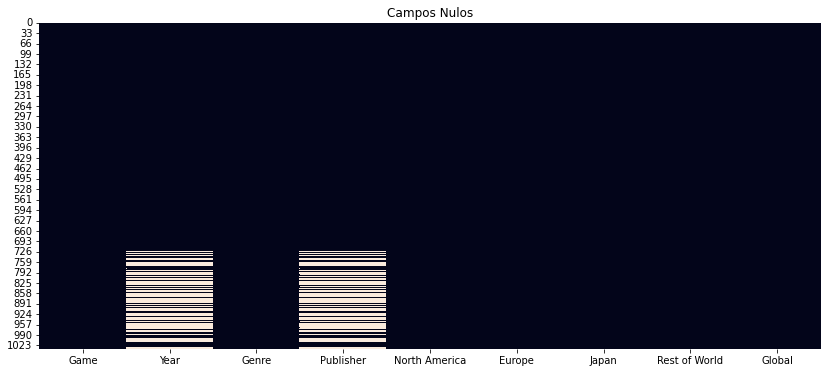

In [ ]:
plt.figure(figsize=(14,6))
plt.title('Campos Nulos')
sns.heatmap(base.isnull(), cbar=False)

In [ ]:
# Retirando registros com valores nulos
base.dropna(inplace=True)

In [ ]:
# Estatísticas
base.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,2015.966061,0.256448,0.311600,0.042048,0.111552,0.721721
std,1.298360,0.620259,0.868271,0.119814,0.274713,1.743122
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.030000
50%,2016.000000,0.050000,0.020000,0.000000,0.020000,0.120000
75%,2017.000000,0.190000,0.220000,0.040000,0.090000,0.560000
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


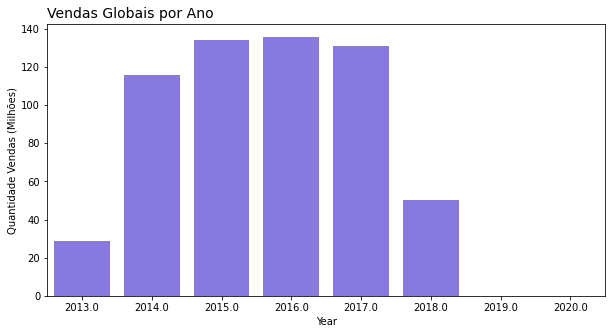

In [ ]:
# Vendas ao longo dos anos
plt.figure(figsize=(10, 5))
plt.title('Vendas Globais por Ano', loc='left', fontsize=14)

sns.barplot(data=base, x='Year', y='Global', ci=None, color='#7B68EE', estimator=sum)
plt.ylabel('Quantidade Vendas (Milhões)');

In [ ]:
# Excluindo anos sem registro (2019 e 2020)
base = base.loc[(base['Year'] != 2019) & (base['Year'] != 2020)]
base

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
...,...,...,...,...,...,...,...,...,...
1024,Biomutant,2018.0,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00
1026,de Blob,2017.0,Platform,THQ Nordic,0.00,0.00,0.00,0.00,0.00
1027,Chaos on Deponia,2017.0,Adventure,Daedalic Entertainment,0.00,0.00,0.00,0.00,0.00
1028,Code Vein,2018.0,Action,Bandai Namco Entertainment,0.00,0.00,0.00,0.00,0.00


In [ ]:
base['Year'].unique()

array([2014., 2015., 2018., 2017., 2016., 2013.])

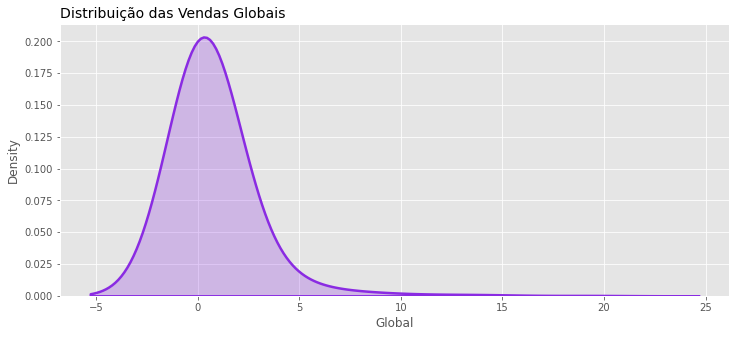

In [ ]:
plt.figure(figsize=(12, 5))
plt.style.use('ggplot')
plt.title('Distribuição das Vendas Globais', loc='left', fontsize=14)
sns.kdeplot(base['Global'], shade=True, bw=1, color='#8A2BE2', linewidth=2.5);

In [57]:
# Distribuição por Ano
base.groupby(by=['Year']).sum()

,North America,Europe,Japan,Rest of World,Global
Year,,,,,
2013.0,10.35,12.88,0.97,4.57,28.76
2014.0,39.80,54.12,3.58,18.29,115.85
2015.0,49.60,56.21,7.28,20.88,133.99
2016.0,47.40,57.98,9.65,20.71,135.72
2017.0,44.77,57.18,9.08,19.89,130.90
2018.0,19.65,18.70,4.13,7.69,50.20


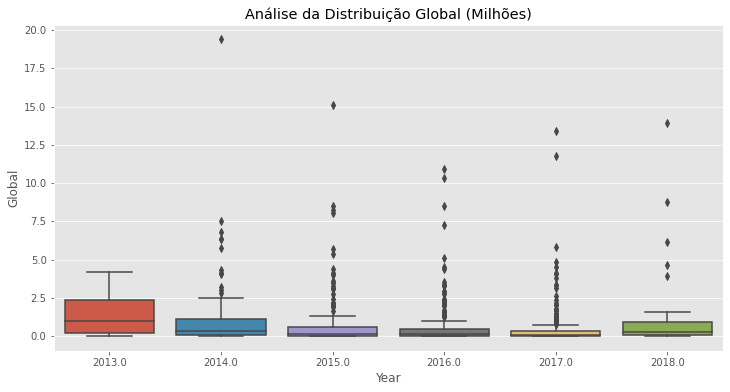

In [58]:
plt.figure(figsize=(12, 6))
plt.title('Análise da Distribuição Global (Milhões)')
sns.boxplot(data=base, x='Year', y='Global');

In [59]:
# Jogos com vendas acima de 10 milhões
base.loc[base['Global'] >= 10]

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33


In [61]:
analise = base.groupby(by=['Year']).sum().reset_index()
america = [America / Total * 100 for America, Total in zip(analise['North America'], analise['Global'])]
europa = [Europa / Total * 100 for Europa, Total in zip(analise['Europe'], analise['Global'])]
japao = [Japao / Total * 100 for Japao, Total in zip(analise['Japan'], analise['Global'])]
mundo_resto = [Resto_Mundo / Total * 100 for Resto_Mundo, Total in zip(analise['Rest of World'], analise['Global'])]
america, europa, japao, mundo_resto

([35.9874826147427,
  34.35476909797151,
  37.01768788715576,
  34.92484526967286,
  34.20168067226891,
  39.14342629482071],
 [44.78442280945759,
  46.71558049201555,
  41.95089185760131,
  42.72030651340996,
  43.68220015278838,
  37.25099601593625],
 [3.372739916550765,
  3.0902028485110056,
  5.433241286663184,
  7.110226937813145,
  6.936592818945759,
  8.227091633466136],
 [15.890125173852576,
  15.78765645230902,
  15.58325248152847,
  15.259357500736812,
  15.194805194805195,
  15.31872509960159])

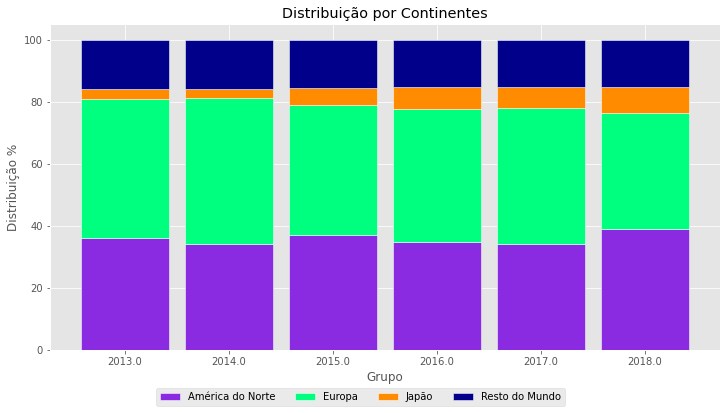

In [67]:
plt.figure(figsize=(12, 6))
largura_barra = 0.85
rotulos = analise['Year']
grupos = [0, 1, 2, 3, 4, 5]

plt.title('Distribuição por Continentes')
# Plot América
plt.bar(grupos, america, width=largura_barra, color='#8A2BE2', edgecolor='white')

# Plot Europa
plt.bar(grupos, europa, bottom=america, width=largura_barra, color='#00FF7F', edgecolor='white')

# Plot Japão
plt.bar(grupos, japao, bottom=[a + b for a, b in zip(america, europa)], width=largura_barra, color='#FF8C00', edgecolor='white')

# Plot Resto do Mundo
plt.bar(grupos, mundo_resto, bottom=[a + b + c for a, b, c in zip(america, europa, japao)], width=largura_barra, color='#00008B', edgecolor='white')

plt.xticks(grupos, rotulos)
plt.xlabel('Grupo')
plt.ylabel('Distribuição %')
plt.legend(['América do Norte', 'Europa', 'Japão', 'Resto do Mundo'], loc='upper left', bbox_to_anchor=(0.15, -0.1), ncol=4);

In [81]:
from sklearn.preprocessing import LabelEncoder
funcao_label = LabelEncoder()

base['Produtor'] = funcao_label.fit_transform(base['Publisher'])
base['Genero'] = funcao_label.fit_transform(base['Genre'])
base['Jogo'] = funcao_label.fit_transform(base['Game'])
base.head(15)

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Produtor,Genero,Jogo
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,107,0,273
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,8,12,98
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,107,1,521
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,8,12,102
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80,40,14,222
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94,41,14,221
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33,113,0,730
7,Spider-Man (PS4),2018.0,Action-Adventure,Sony Interactive Entertainment,3.64,3.39,0.32,1.41,8.76,113,1,601
8,Call of Duty: Infinite Warfare,2016.0,Shooter,Activision,3.11,3.83,0.19,1.36,8.48,8,12,100
9,Fallout 4,2015.0,Role-Playing,Bethesda Softworks,2.91,3.97,0.27,1.34,8.48,19,11,226


In [76]:
paleta_cores = sns.color_palette('hsv', 8)
paleta_cores

[(1.0, 0.6485300602947661, 0.0),
 (0.7029398794104678, 1.0, 0.0),
 (0.03124934374934376, 1.0, 1.3125013124790507e-06),
 (0.0, 1.0, 0.617278533938476),
 (0.0, 0.7110320290467349, 1.0),
 (0.0, 0.062501968751969, 1.0),
 (0.6091898794104678, 0.0, 1.0),
 (1.0, 0.0, 0.742280060294766)]

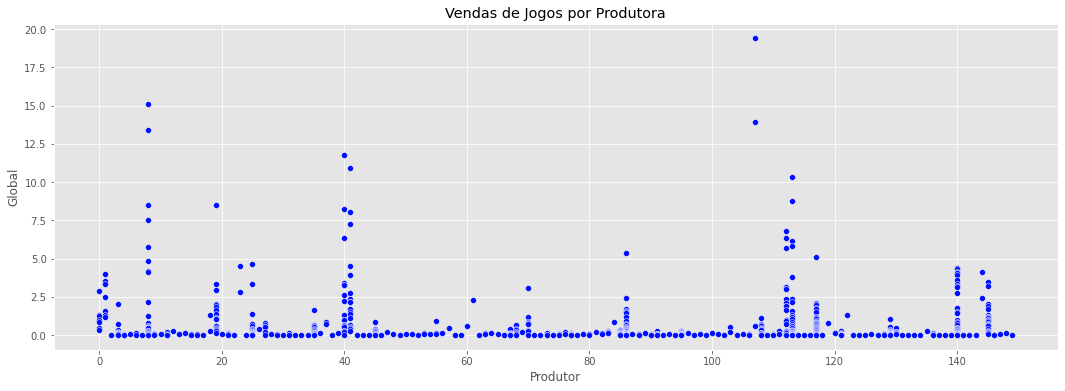

In [90]:
plt.figure(figsize=(18, 6))
plt.title('Vendas de Jogos por Produtora')
sns.scatterplot(data=base, x='Produtor', y='Global', color=paleta_cores[5]);

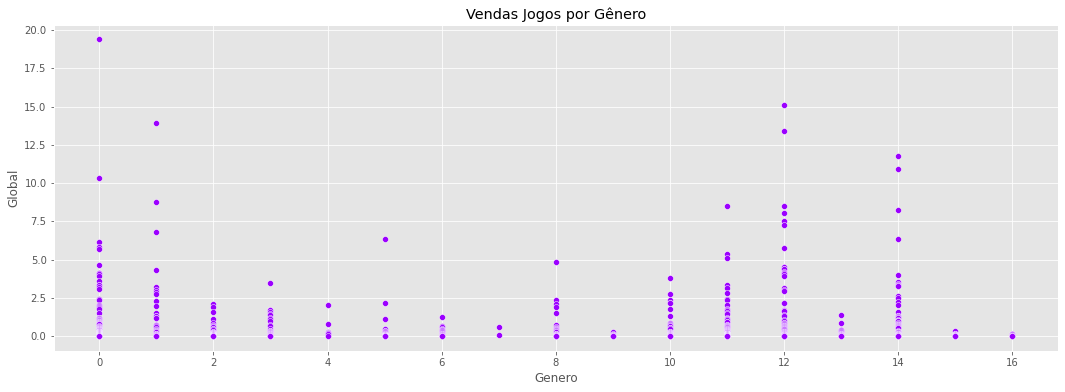

In [89]:
plt.figure(figsize=(18, 6))
plt.title('Vendas Jogos por Gênero')
sns.scatterplot(data=base, x='Genero', y='Global', color=paleta_cores[6]);

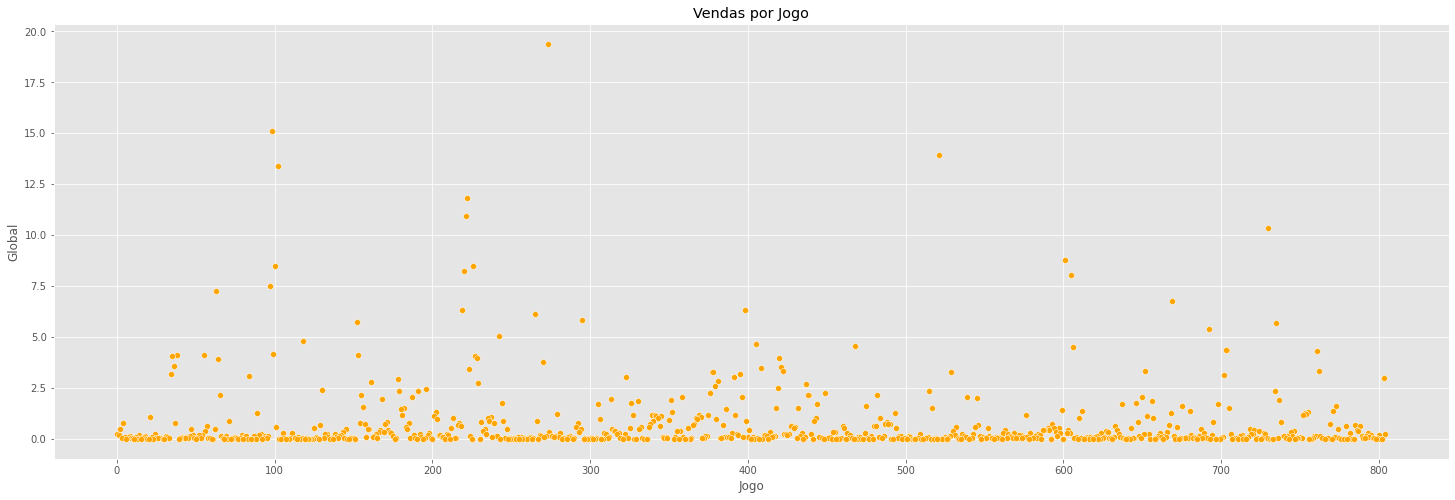

In [87]:
plt.figure(figsize=(25, 8))
plt.title('Vendas por Jogo')
sns.scatterplot(data=base, x='Jogo', y='Global', color=paleta_cores[0]);